knn is used for calculating the category of the data point.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
px.scatter(df,x='Glucose',y='Age',color='Outcome',symbol='Outcome')

<AxesSubplot:>

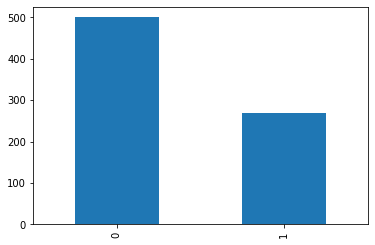

In [4]:
df.Outcome.value_counts().plot(kind='bar')

In [5]:
X=df[['Glucose','Age']]
y=df['Outcome']
scaler=StandardScaler()
scaledX=scaler.fit_transform(X)
xtrain,xtest,ytrain,ytest=train_test_split(scaledX,y,test_size=.2,random_state=1)
xtrain.shape,xtest.shape
    

((614, 2), (154, 2))

In [6]:
m=KNeighborsClassifier(n_neighbors=10)
m.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [7]:
m.score(xtest,ytest)#you should not see the score like this , we use other stuff

0.7987012987012987

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
ypred=m.predict(xtest)

In [10]:
import seaborn as sns

In [11]:
cm=confusion_matrix(ytest,ypred)
print(cm)

[[91  8]
 [23 32]]


In [12]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        99
           1       0.80      0.58      0.67        55

    accuracy                           0.80       154
   macro avg       0.80      0.75      0.76       154
weighted avg       0.80      0.80      0.79       154



In [13]:
from matplotlib.colors import ListedColormap
import numpy as np

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


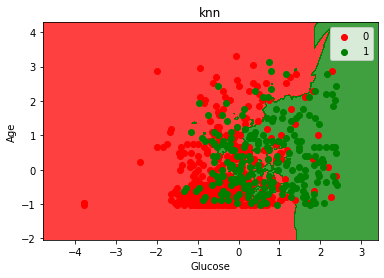

In [14]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,'knn','Glucose','Age')

GRID SEARCH

In [15]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

from joblib import dump, load
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
X=df[['Glucose','Insulin','Age']]
y=df['Outcome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=True)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
print("knn classification")
model2=KNeighborsClassifier(weights='distance',n_neighbors=10)
model2.fit(xtrain,ytrain)
print("score:",model2.score(xtest,ytest)*100)
pred=model2.predict(X)
print("mae:",mean_absolute_error(y,pred))
print("mse:",mean_squared_error(y,pred))

knn classification
score: 74.02597402597402
mae: 0.055989583333333336
mse: 0.055989583333333336


In [18]:
knn_score=cross_val_score(model2,X,y,cv=10)
print(knn_score,f"average:{knn_score.mean():.2f}",f"std:{knn_score.std():.2f}")


[0.68831169 0.7012987  0.67532468 0.62337662 0.74025974 0.75324675
 0.75324675 0.77922078 0.76315789 0.68421053] average:0.72 std:0.05


In [19]:
params={
    'n_neighbors': list(range(1,30,3)),
    'criterion':['ball_tree','Kd_tree','brute','auto'],
    'weights':['uniform'],
    'metric':['minkowski'],
    'p':[1,2]
}
params


{'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28],
 'criterion': ['ball_tree', 'Kd_tree', 'brute', 'auto'],
 'weights': ['uniform'],
 'metric': ['minkowski'],
 'p': [1, 2]}

In [20]:
grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=2,n_jobs=-1,verbose=2)


In [21]:
grid.fit(scaledX,y)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


In [ ]:
gf=pd.DataFrame(grid.cv_results_)

In [ ]:
gf

In [ ]:
gf.sort_values(by='rank_test_score',inplace=True)


In [ ]:
gf